Анализ сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;




с подпиской Ultra
абонентская плата — 199 рублей в месяц; 
стоимость одной минуты поездки — 6 рублей;   
стоимость старта — бесплатно.

Описание данных   
Пользователи — users_go.csv  
user_id — уникальный идентификатор пользователя  
name — имя пользователя 
age — возраст  
city — город  
subscription_type — тип подписки (free, ultra)   

Поeздки — rides_go.csv  
user_id — уникальный идентификатор пользователя   
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)    
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до 
момента, как он нажал кнопку «Завершить поездку»  
date — дата совершения поездки  

Подписки — subscriptions_go.csv  
subscription_type — тип подписки  
minute_price — стоимость одной минуты поездки по данной подписке  
start_ride_price — стоимость начала поездки  
subscription_fee — стоимость ежемесячного платежа  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users= pd.read_csv('/datasets/users_go.csv')
riders= pd.read_csv('/datasets/rides_go.csv')
subscriptions= pd.read_csv('/datasets/subscriptions_go.csv')




In [3]:
users.info()
display(users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
riders.info()
display(riders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subscriptions.info()
display(subscriptions.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

In [6]:
riders['date'] = pd.to_datetime(riders['date'], format='%Y-%m-%d')
riders['month'] = riders['date'].dt.month

Вводим новую переменную и меняем формат по заданию

In [7]:
print('Количество пропусков:',users.isna().sum())
print(users.duplicated().sum())


Количество пропусков: user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
31


In [8]:
print('Количество пропусков:',riders.isna().sum())
riders.duplicated().sum()

Количество пропусков: user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


0

In [9]:
print('Количество пропусков:',subscriptions.isna().sum())
subscriptions.duplicated().sum()

Количество пропусков: subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


0

In [10]:

print(users['user_id'].duplicated().sum())
users.drop_duplicates(inplace=True)
print(users['user_id'].duplicated().sum())

31
0


 Вывод:  
 В представленных данных отсутсвовали пропуски, однако в датасете, содержащем информацию о пользователях присутсвовало некоторое количество дубликатов, возможно это связано с программной ошибкой, так как данные повторялись в столбце с ID. 
 
 Данные предобработаны, дубликаты удалены.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов



Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

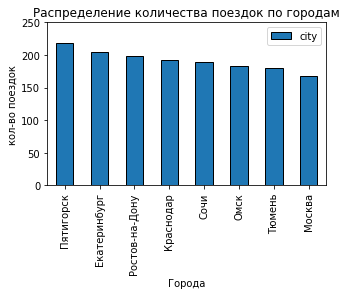

In [11]:
count_users_by_city = users['city'].value_counts()
display(count_users_by_city)


count_users_by_city.plot.bar(figsize=(5, 3), ec='black', legend=True)

plt.title('Распределение количества поездок по городам')
plt.xlabel('Города')
plt.ylabel('кол-во поездок')
plt.ylim(0, 250)
plt.show()

Можно заметить что в представленных данных нет особых выбросов по количеству поездок в отдельных городах. Наибольшее количество услуг было куплено в Пятигорске, наименьшее в Москве, но разрыв между ними менее 50 единиц.

In [12]:
count_users_by_city['rate'] = round(users['city'].value_counts() / count_users_by_city.sum(), 2) * 100
display(count_users_by_city['rate'])

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

Еще раз убеждаемся что явного преобладания данных из отдельных городов нет и распределние равномерно.

##### Распределние типов подписки

In [13]:
type_of_sub = users['subscription_type'].value_counts()
display(type_of_sub)

free     835
ultra    699
Name: subscription_type, dtype: int64

In [14]:
type_of_sub['rate'] = round(users['subscription_type'].value_counts() / type_of_sub.sum(), 2) * 100
display(type_of_sub['rate'])

free     54.0
ultra    46.0
Name: subscription_type, dtype: float64

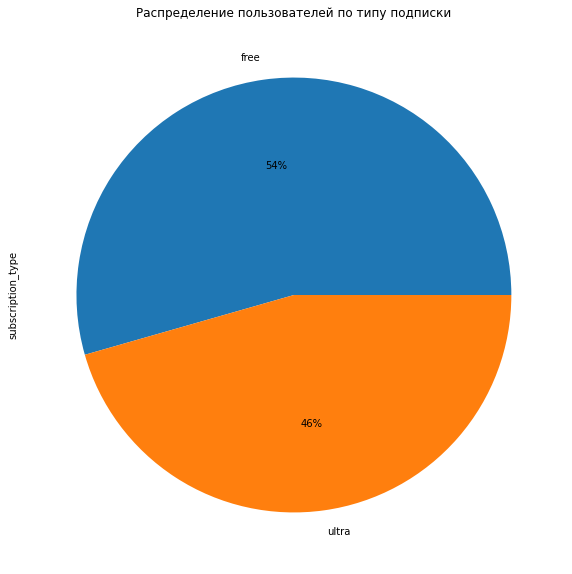

In [15]:
users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_users_by_city,
    autopct = '%1.0f%%',
    figsize=(10,10), 
    title = 'Распределение пользователей по типу подписки');

Можно сделать выводы о том что бесплатный тип подписки более популярен, однако его преобладание над платным минимально, следовательно можно сделать выводы о успешности ее тарифа.

##### Возраст подписчиков

In [16]:
display(users['age'].max())
#Самый старший пользователь

43

In [17]:
display(users['age'].min()) #Самый младший пользователь

12

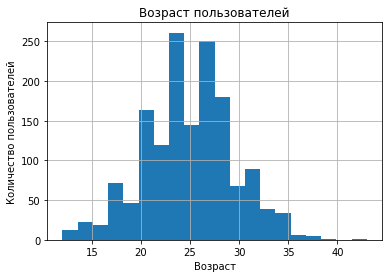

In [18]:
plt.hist(users['age'], bins = 20)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [19]:
type_of_age = users['age'].value_counts()
display(type_of_age)


25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [20]:
def age_category(row): 
    
    if row <= 18:
        return 'Младше целевой'
    elif 20<= row <= 28:
        return 'Целевая аудитория'
    else:
        return 'Старше целевой'
    

users['age_category'] = users['age'].apply(age_category)

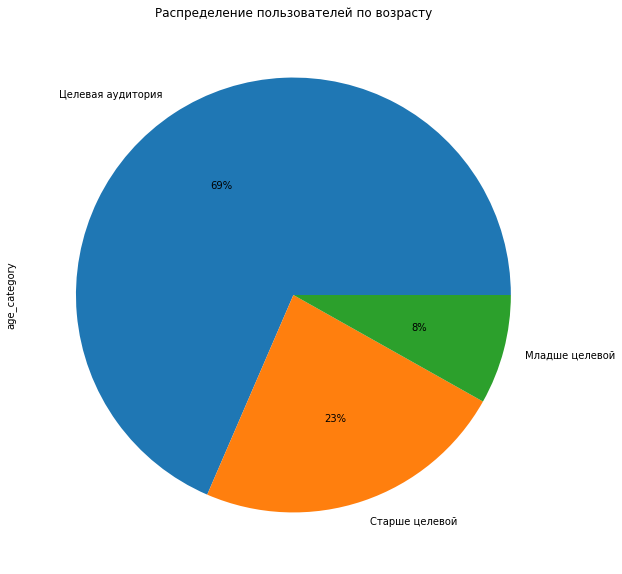

In [21]:
users['age_category'].value_counts().plot(
    kind = 'pie', 
    y = type_of_age,
    autopct = '%1.0f%%',
    figsize=(10,10), 
    title = 'Распределение пользователей по возрасту');

Наибольшее количество пользователей сосредоточено в диапазоне от 20 до 28 лет (Около 70%), следовательно именно эту возрастную группу можно считать целевой, скорее всего это связано с потребностью людей данного возраста в мобильных средствах перемещения, не ограниченных наличием парковочных мест и топливом.

##### Расстояние, которое пользователь преодолел за одну поездку

In [22]:
worst_riders_rate=riders['distance'].sort_values()
display(round(worst_riders_rate, 2).head(15))

11555     0.86
9541      2.57
13690     4.33
8658      6.78
7841      7.10
8906     11.28
8324     12.23
13940    15.00
15626    15.37
11862    15.63
17414    22.31
15104    22.39
6691     23.96
9784     26.78
17173    27.97
Name: distance, dtype: float64

In [23]:
best_riders_rate=riders['distance'].sort_values(ascending=False)
display(round(best_riders_rate, 2).head(15))

16309    7211.01
16484    7066.00
15580    6908.49
17171    6760.94
17242    6724.93
10341    6671.97
11385    6601.20
12086    6538.94
10915    6535.39
11319    6503.60
11189    6456.42
8527     6436.63
7913     6427.05
13701    6414.52
7635     6395.40
Name: distance, dtype: float64

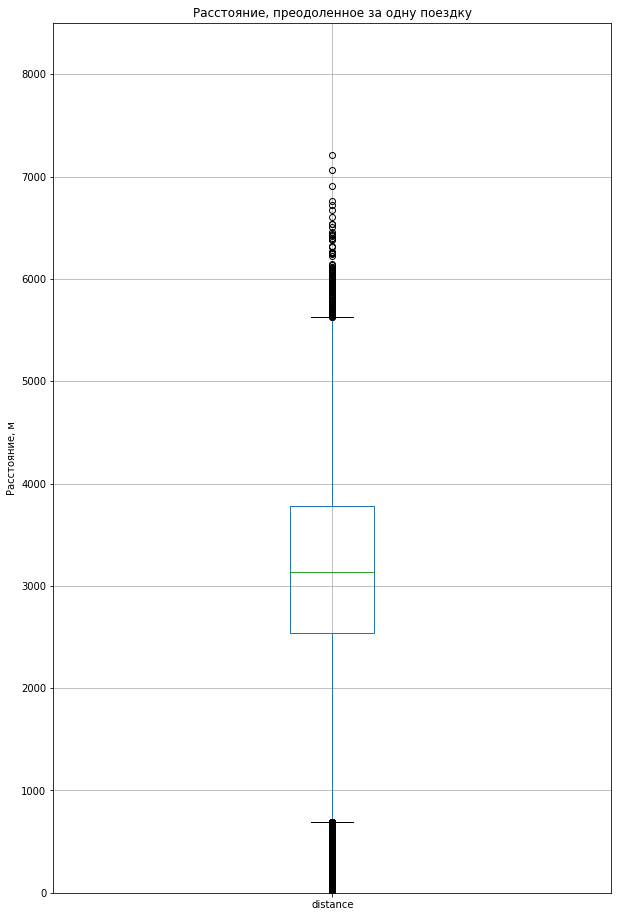

In [24]:
riders.boxplot(column='distance' , figsize=(10, 16))
plt.title('Расстояние, преодоленное за одну поездку')
plt.ylim(0, 8500)
plt.ylabel('Расстояние, м')

plt.show()

Выяснили наиболее продолжительные и короткие поездки, а также отдельный график, который позволяет сделат определенные выводы.   Во первых присутсвует большое количество поездок протяженностью до километра, среди которых есть сверхкороткие, которые скорее всего были начаты и тут же прекращены по неким причинам, скорее всего связанных либо с выбором иного транспорта, либо с тем что самокат арендовался "на пробу".   
Также присутсвует некое количество поездок свыше 6 километров, однако основное их колиество не превышает данную планку, с наибольшей вероятностью данные поездки брались для путешествий между районами городов, либо для экскурсий по местности, которые подразумевали длинные дистанции.

##### Продожительность поездок


In [25]:
riders['duration'].sort_values().head(10)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
Name: duration, dtype: float64

In [26]:
riders['duration'].sort_values(ascending=False).head(10)

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
143     38.125729
3729    37.014141
499     36.906491
6348    36.809310
4653    36.622595
Name: duration, dtype: float64

In [27]:
riders_dur_tot = riders.groupby(['user_id']).sum()

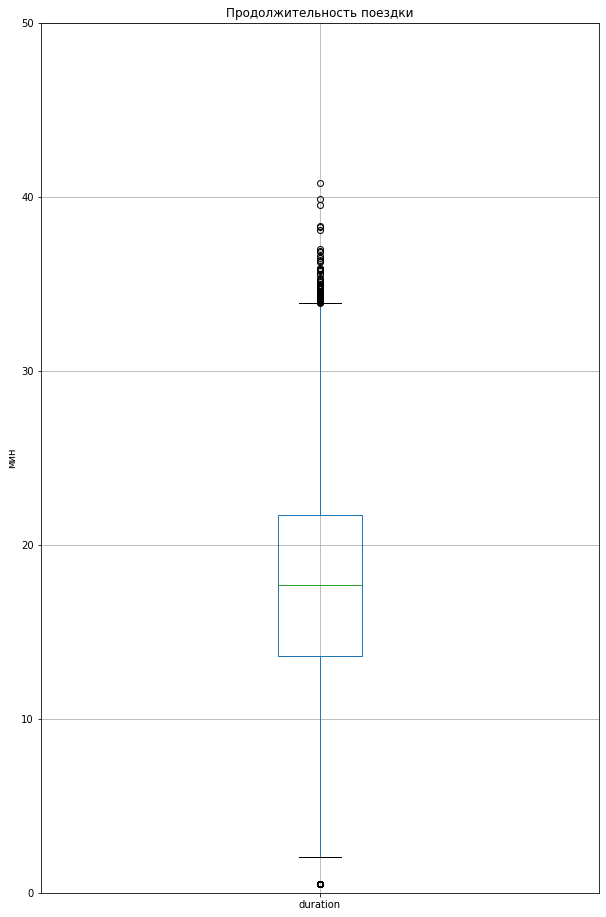

In [28]:
riders.boxplot(column='duration' , figsize=(10, 16))
plt.title('Продолжительность поездки')
plt.ylim(0, 50)
plt.ylabel('мин')

plt.show()


In [29]:
riders['duration'].describe().T

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Можно сделать выводы о продолжительности поездок. Присутсвует большое количество малых выбросов, продолжительностью менее минуты, которые скорее всего означают случаи ошибочной активации самокатов и для дальнейшего анализа их стоит исключить

In [30]:

riders['duration'].sort_values().head(10)


12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
Name: duration, dtype: float64

In [31]:
riders['duration'].describe().T

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

#### Шаг 4. Объединение данных

In [32]:
print('Размер сета 1:',riders.info() )
print('Размер сета 2:',users.info() )
print('Размер сета 3:',subscriptions.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
Размер сета 1: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
 5   age_category       1534 non-null   obje

In [33]:
full_data = riders.merge(users)
full_data = full_data.merge(subscriptions)
full_data.info()
display(full_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   age_category       18068 non-null  object        
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory 

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_category,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0


In [34]:
print('Количество пропусков:',full_data.isna().sum())


Количество пропусков: user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
age_category         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [35]:
free_sub = full_data.query("`subscription_type` == 'free'")
display(free_sub)

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_category,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,Целевая аудитория,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,Целевая аудитория,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,Целевая аудитория,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,Целевая аудитория,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,Целевая аудитория,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,Целевая аудитория,8,50,0


In [36]:
pay_sub = full_data.query("`subscription_type` != 'free'")
display(pay_sub)

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_category,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,Целевая аудитория,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,Целевая аудитория,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,Целевая аудитория,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,Целевая аудитория,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,Целевая аудитория,6,0,199


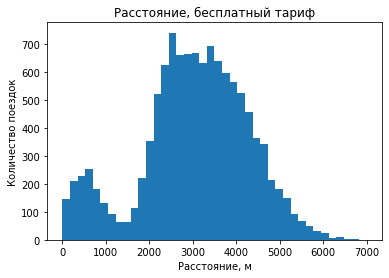

<Figure size 1440x1440 with 0 Axes>

In [37]:
plt.hist(free_sub['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

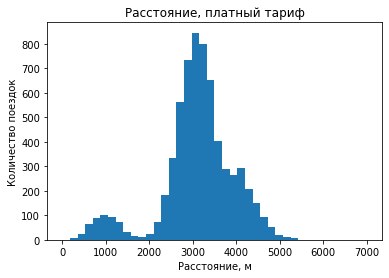

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.hist(pay_sub['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

In [1]:
plt.hist(free_sub['duration'], bins=40, range = (0, 40))
plt.title('Продолжительность, бесплатный тариф')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

NameError: name 'plt' is not defined

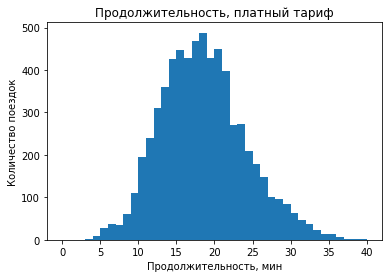

<Figure size 1440x1440 with 0 Axes>

In [40]:
plt.hist(pay_sub['duration'], bins=40, range = (0, 40))
plt.title('Продолжительность, платный тариф')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

In [41]:
free_ssub = free_sub.query("10 <= duration <= 25")
free_ssub['duration'].count()/free_sub['duration'].count()

0.7640905947441217

In [42]:
pay_ssub = pay_sub.query("10 <= duration <= 25")
pay_ssub['duration'].count()/pay_sub['duration'].count()


0.8301538461538461

Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.

Выделили два датафрейма на основе full_data:

free_sub - Информация о пользователях с бесплатным тарифом  
pay_sub - Информация о пользователях с платным тарифом  
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до  28 минут, и проезжают от 2 до 5,5 км.

Платный тариф. В основном время укладывается в промежуток от 12 до 25 минут. В основном преодоленное расстояние находится в промежутке между 2,5 и 5 км.

Можно сделать вывод о том, что пользователи бесплатного тарифа в основном совершают более длинные поездки, однако "плотность" графика продолжительности у платного тарифа выше, следовательно использующие его клиенты берут самокат на более продолжительное время. (процент этих "выгодных" поездок больше"

#### Шаг 5. Подсчёт выручки

In [43]:
total_data = pd.pivot_table(full_data,
                           index=['user_id', 'month'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [44]:
total_data['duration'] = np.ceil(total_data['duration'])
    #Округляем длительность поездки для удобства расчета


def revenue(row): 
    
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    

total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)
 
    #Стоимость поездок
    


In [45]:
total_data.sort_values(by='user_id').head(14)

distance  duration  name subscription_type  \
user_id month                                                   
1       1       7027.511294      42.0     2             ultra   
        4        754.159807       7.0     1             ultra   
        8       6723.470560      45.0     2             ultra   
        10      5809.911100      32.0     2             ultra   
        11      7003.499363      54.0     3             ultra   
        12      6751.629942      28.0     2             ultra   
2       12      3828.248580      12.0     1             ultra   
        8        923.007439       7.0     1             ultra   
        7       6780.722964      47.0     2             ultra   
        10      2824.636598      19.0     1             ultra   
        4       6164.381824      40.0     2             ultra   
        3      10187.723006      61.0     3             ultra   
        6       3255.338202      14.0     1             ultra   
3       1       3061.777147      13.0     1             ultra   

               revenue_per_month  
user_id month                     
1       1                  451.0  
        4                  241.0  
        8                  469.0  
        10                 391.0  
        11                 523.0  
        12                 367.0  
2       12                 271.0  
        8                  241.0  
        7                  481.0  
        10                 313.0  
        4                  439.0  
        3                  565.0  
        6                  283.0  
3       1                  277.0

In [46]:
print(total_data.count())

distance             11331
duration             11331
name                 11331
subscription_type    11331
revenue_per_month    11331
dtype: int64


In [47]:

tot_p=(total_data.query("`subscription_type` != 'free'"))['revenue_per_month'].sum()

print( 'Общая выручка от платной подписки' ,tot_p)

a=(total_data.query("`subscription_type` != 'free'"))['revenue_per_month'].count()
print(a)
print( 'Средняя выручка от одного клиента' ,tot_p/a)

Общая выручка от платной подписки 1638597.0
4533
Средняя выручка от одного клиента 361.48180013236265


In [48]:
tot_f=(total_data.query("subscription_type == 'free'"))['revenue_per_month'].sum()

print( 'Общая выручка от бесплатной подписки' ,tot_f)

b=(total_data.query("subscription_type == 'free'"))['revenue_per_month'].count()
print(b)
print( 'Средняя выручка от одного клиента' ,tot_f/b)

Общая выручка от бесплатной подписки 2215080.0
6798
Средняя выручка от одного клиента 325.84289496910856


Вывод

Стояла задача посчитать выручку от пользователя, для этого был создан отдельный фрейм с данными, с помощью которого проводились расчеты месячной выручки.  
Дополнительно посчитана общая выручка от каждого вида подписок

На основе полученных данных можно сделать выводы о том, что наибольшую выручку приносят пользователи с беспплатной подпиской, однако "полезность" отдельного платного пользователя выше.

#### Шаг 6. Проверка гипотез

##### 
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [49]:

results = st.ttest_ind(pay_sub['duration'], free_sub['duration'],alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [50]:
alfa= pay_sub.groupby('month')['duration'].agg('mean')
display(alfa)

month
1     18.485477
2     18.769602
3     18.448815
4     18.535757
5     18.669553
6     18.577652
7     18.616210
8     18.673556
9     18.500180
10    18.385764
11    18.516679
12    18.329836
Name: duration, dtype: float64

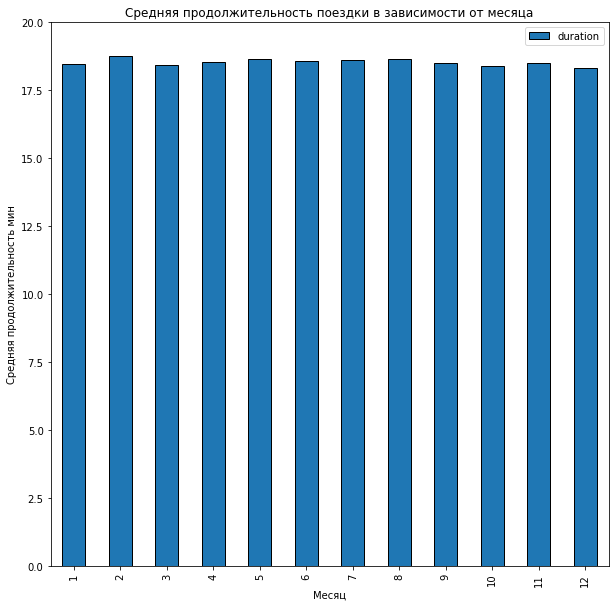

In [51]:
alfa.plot.bar(figsize=(10, 10 ), ec='black', legend=True)
plt.title('Средняя продолжительность поездки в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность мин')
plt.ylim(0, 20)
plt.show()

In [52]:
beta= free_sub.groupby('month')['duration'].agg('mean')
display(beta)


month
1     17.464604
2     17.145547
3     17.067239
4     17.535376
5     17.641981
6     17.552159
7     17.486667
8     17.153732
9     17.415103
10    17.212303
11    17.424713
12    17.562634
Name: duration, dtype: float64

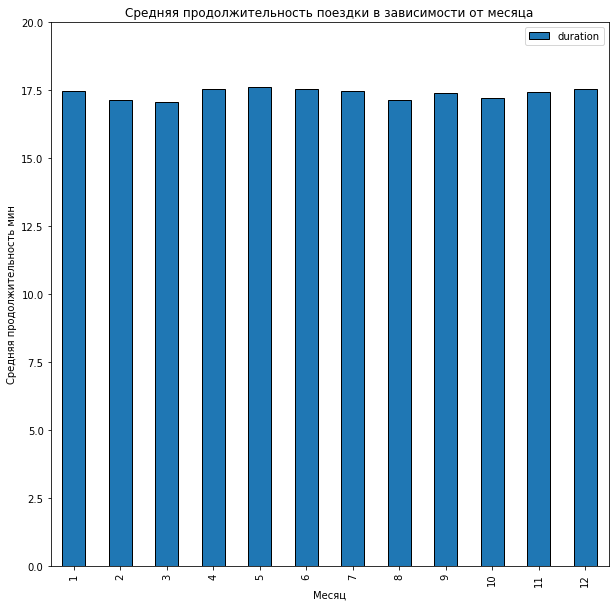

In [53]:
beta.plot.bar(figsize=(10, 10 ), ec='black', legend=True)
plt.title('Средняя продолжительность поездки в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность мин')
plt.ylim(0, 20)
plt.show()

<AxesSubplot:xlabel='month'>

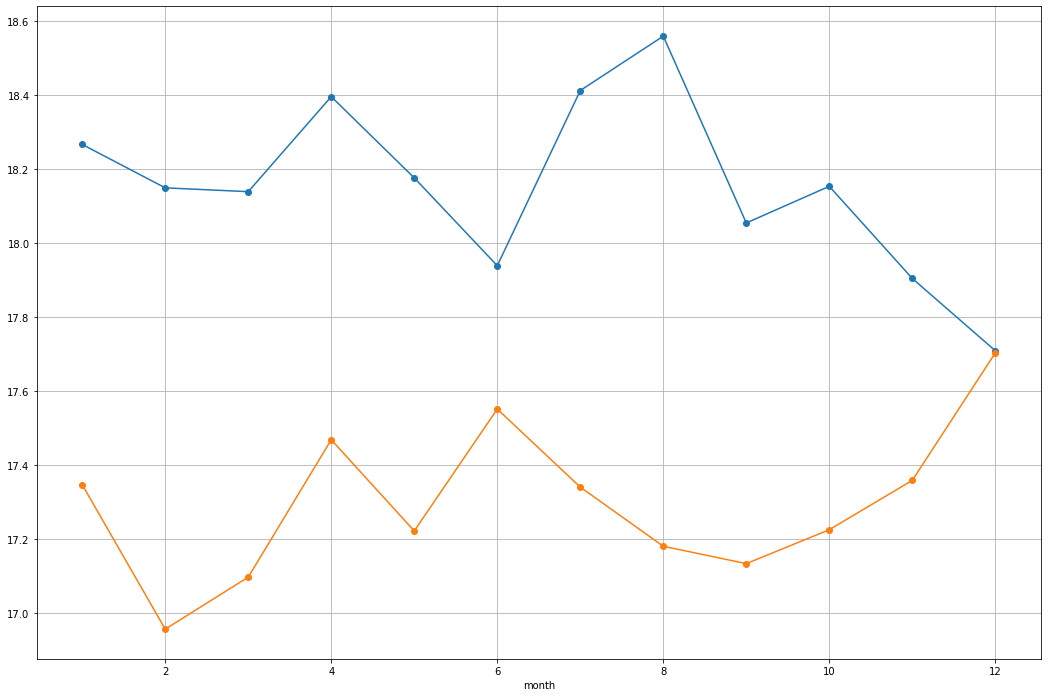

In [54]:
pivot_table_beta = free_sub.pivot_table(index = 'month', values = 'duration', aggfunc = ['mean', 'count', 'median'])
pivot_table_beta.columns = ['mean', 'count', 'median']



pivot_table_alfa = pay_sub.pivot_table(index = 'month', values = 'duration', aggfunc = ['mean', 'count', 'median'])
pivot_table_alfa.columns = ['mean', 'count', 'median']

ax=pivot_table_alfa.plot(y = 'median',marker='o', grid=True, figsize=(10, 10), legend=False)
pivot_table_beta.plot(ax=ax ,y = 'median',marker='o', grid=True, figsize=(18, 12), legend=False)

Мы проверили нулевую гипотезу и отверглии ее.  
На графике выше наглядно показано что продолжительность поездок у клиентов безз подписок выше, следовательно мы принимаем альтернативную гипотезу.


In [55]:
ultra_dist = pay_sub['distance']

interested_value = 3130.0
alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.
Плюсом опровержением этому служат данные обработанные ранее, см пункт 4 раздел о расстоянии пройденном платными пользователями.

##### 
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [56]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


In [57]:
print( 'Общая выручка от платной подписки' ,(total_data.query("`subscription_type` != 'free'"))['revenue_per_month'].sum())

a=(total_data.query("`subscription_type` != 'free'"))['revenue_per_month'].count()
print( 'Средняя выручка от одного клиента' ,((total_data.query("`subscription_type` != 'free'"))['revenue_per_month'].sum()/a))




Общая выручка от платной подписки 1638597.0
Средняя выручка от одного клиента 361.48180013236265


In [58]:
print( 'Общая выручка от бесплатной подписки' ,(total_data.query("`subscription_type` == 'free'"))['revenue_per_month'].sum())
b=(total_data.query("`subscription_type` == 'free'"))['revenue_per_month'].count()
print( 'Средняя выручка от одного клиента' ,((total_data.query("`subscription_type` == 'free'"))['revenue_per_month'].sum()/b))

Общая выручка от бесплатной подписки 2215080.0
Средняя выручка от одного клиента 325.84289496910856


опять же это рассматривалось ранее, средняя выручка от клиентов без подписки выше, следовательно нулевую гипотезу отвергаем

##### 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых выборок.


Гипотезы будут сформулированы так:

H0 : μ1 = μ2

H1 : μ1 != μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Шаг 7. Распределения

##### 

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

<BarContainer object of 101 artists>

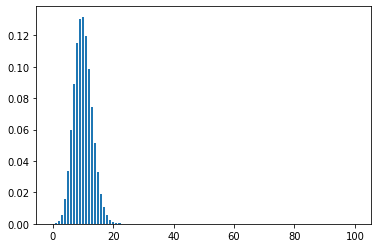

In [59]:
from math import factorial
n = 100 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

In [60]:
distr = st.norm(100, 10) 
x = 5

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)

print(result)

1.0494515075362604e-21


Пока в раздумьях как делать, прошу проверить обязательную часть

#### Шаг 8. Вывод 

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца date из датафрейма riders к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.

Пользователей, использующих бесплатную подписку больше ~54% от общего числа пользователей. На платной подписке  ~46%.

Возраст пользователей укладывается в промежуток от 12 до 43 лет, наибольшее их количество сосредоточено в промежутке от 20 до 30.  

В основном пользователи проезжают от 2.5 км до 4 км.

Чаще всего длительность поездки состовляет 15 - 25 минут

Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 6 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. проезжают от 2,5 до 5 км.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

Выясили что для компании экономически выгоднее пользователи бесплатной подписки. 

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу

Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу